<h1> Projeto Time Series</h1><br>
<p>Este Projeto tem como finalidade desenvolver minhas habilidades com Time series.<br>
Este que é um tipo de análise muito importante, a princípio será uma análise com somente uma váriavel, posteriormente pretendo fazer outra
multivariada.<br>
O dataset foi retirado do Kaggle, site para competições de machine learning , deixarei um link para acesso deste e de outros conjuntos de dados:<br></p>
<a href= https://www.kaggle.com/mvsfnig/time-series-pam>Clique aqui para acessar a página</a><br>
<p>O dataset para esta análise será sobre as manchas solares.</p>


In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Carregando o arquivo Time Series, convertendo a coluna ano em um objeto do tipo data
# e o tornando índice
solar = pd.read_csv("Manchas_Solares.csv", parse_dates=['Ano'], index_col=['Ano'] )
solar.head()

,manchas
Ano,
1749-01-01,80.9
1750-01-01,83.4
1751-01-01,47.7
1752-01-01,47.8
1753-01-01,30.7


In [3]:
# Verificando o shape do dataset
solar.shape

(176, 1)

In [4]:
solar.columns

Index(['manchas'], dtype='object')

In [5]:
solar.index

DatetimeIndex(['1749-01-01', '1750-01-01', '1751-01-01', '1752-01-01',
               '1753-01-01', '1754-01-01', '1755-01-01', '1756-01-01',
               '1757-01-01', '1758-01-01',
               ...
               '1915-01-01', '1916-01-01', '1917-01-01', '1918-01-01',
               '1919-01-01', '1920-01-01', '1921-01-01', '1922-01-01',
               '1923-01-01', '1924-01-01'],
              dtype='datetime64[ns]', name='Ano', length=176, freq=None)

In [6]:
# Verificando se existem valores nulos
solar.isna().any()

manchas    False
dtype: bool

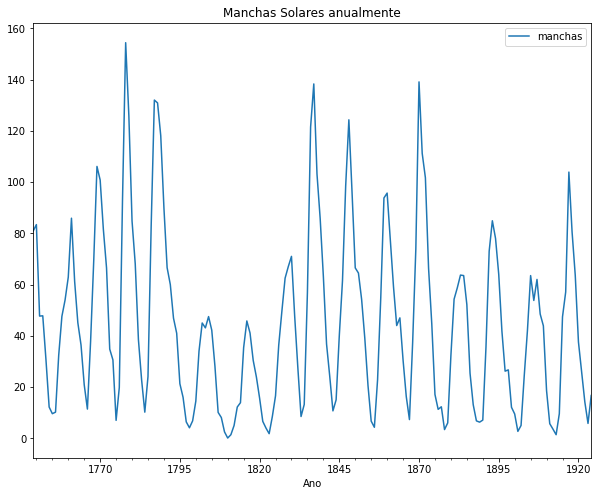

In [7]:
# Plotando um gráfico para visualizar a tendência dos dados
solar.plot(figsize=(10,8))
plt.title("Manchas Solares anualmente")
plt.show()

In [8]:
# Determinando o rolling statistics
rollmean = solar.rolling(window= 10).mean()
rollstd = solar.rolling(window= 10).std()

<p> A seguir estou verificando se a Time Series é estacionária. <br>
  
Observando gráficamente os dados estão distribuidos de forma irregular, ou seja, não é estacionária, a média, desvio-padrão não seguem uma constância, porém, afirmar somente
visualizando o gráfico é algo não saudável, vamos olhar estatisticamente.</p> 


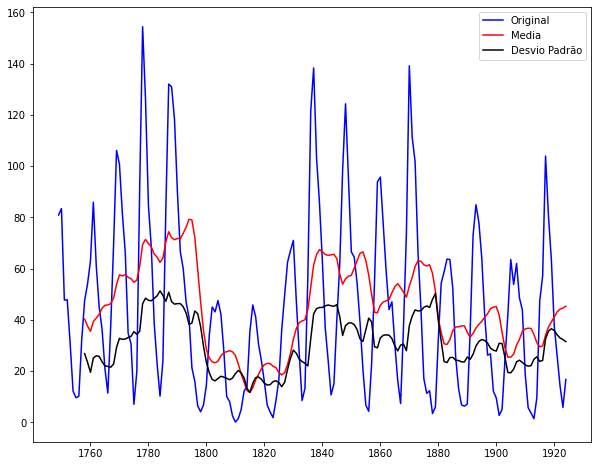

In [9]:
plt.figure(figsize=(10,8))
plt.plot(solar, color = 'blue', label = "Original")
plt.plot(rollmean, color = 'red', label = 'Media')
plt.plot(rollstd, color = 'black', label = "Desvio Padrão")
plt.legend(loc = 'best')
plt.show()

<p>Estatisticamente podemos afirmar que os dados já estão em um formato estacionário, pois o pvalue é menor que 0.05 e
    o teste estatistico é menor que o valor critico de 5%, esse é o intervalo de confiança, o dataset possui 95% de chance de ser estacionário contradizendo nossa hipótese de quando olhamos somente o gráfico de frequência acima.</p>

In [10]:
# É estacionária
dfteste = adfuller(solar.manchas, autolag= 'AIC')
dfoutput = pd.Series(dfteste[0:4], index=['test statistics', 'Pvalue', 'Number of lags', 'Number of observation'])

for key, value in dfteste[4].items():
    dfoutput["Critical Values (%s)" %key] = value
print(dfoutput)

test statistics           -3.015239
Pvalue                     0.033496
Number of lags             7.000000
Number of observation    168.000000
Critical Values (1%)      -3.469886
Critical Values (5%)      -2.878903
Critical Values (10%)     -2.576027
dtype: float64


<p>Vamos modularizar todas operações feitas até aqui para conseguirmos identificar se um dataset é ou não estacionário.</p>

In [11]:
def checkStationary(serie):
    # Rolling Statistics
    rollmean = serie.rolling(window= 10).mean()
    rollstd = serie.rolling(window= 10).std()
    
    # Plot comparativo
    
    plt.figure(figsize=(10,8))
    plt.plot(serie, color = 'blue', label = "Original")
    plt.plot(rollmean, color = 'red', label = 'Media')
    plt.plot(rollstd, color = 'black', label = "Desvio Padrão")
    plt.legend(loc = 'best')
    plt.show()
    
    
    # Teste Estatístico 
    
    dfteste = adfuller(serie.manchas, autolag= 'AIC')
    dfoutput = pd.Series(dfteste[0:4], index=['test statistics', 'Pvalue', 'Number of lags', 'Number of observation'])
    
    print("\n")
    print("Verificando estatisticamente se a time series é estacionária")
    print("\n")
    
    for key, value in dfteste[4].items():
        dfoutput["Critical Values (%s)" %key] = value
    print(dfoutput)
        

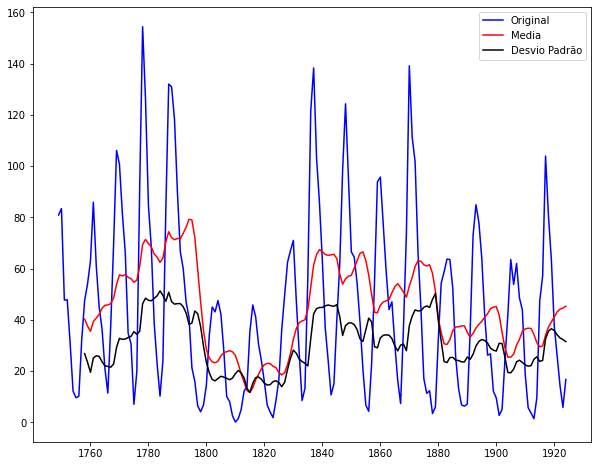



Verificando estatisticamente se a time series é estacionária


test statistics           -3.015239
Pvalue                     0.033496
Number of lags             7.000000
Number of observation    168.000000
Critical Values (1%)      -3.469886
Critical Values (5%)      -2.878903
Critical Values (10%)     -2.576027
dtype: float64


In [12]:
checkStationary(solar)

<p>Será que é possivel deixar esta time series com valores melhores ?</p>

<h2>Convertendo datasets não estacionários em estacionários</h2>
<p>Existem algumas técnicas que podemos aplicar para converter uma time series. Dentre elas:
    <ul>
        <li>Log</li>
        <li>Diferencça da média usando o método Rolling</li>
        <li>Diferença exponencial da Rolling Average</li>
        <li>Diferença pelo os valores prévios usando Shift()</li>
        <li>Decomposição de sazonalidade</li>
        <li>Combinação de todos o anteriores</li>

</ul></p>

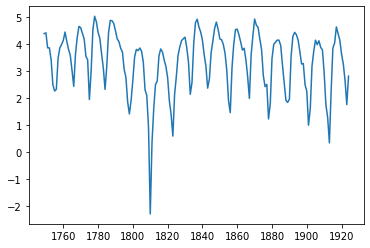

In [13]:
# Usando o método logarítmico
df_logscale = np.log(solar)
plt.plot(df_logscale)
plt.show()

<p>O dataset que era estacionário agora se tornou não-estacionario</p>

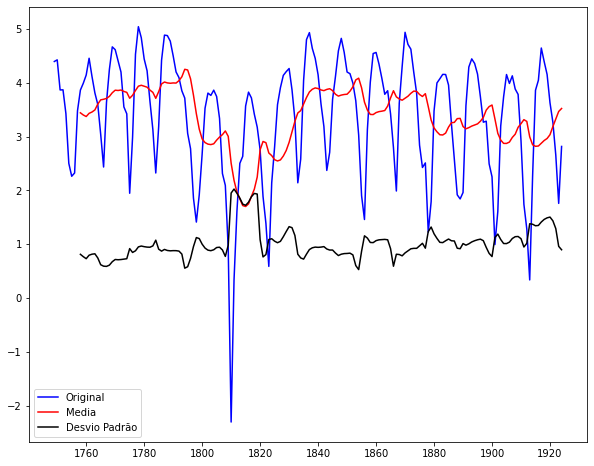



Verificando estatisticamente se a time series é estacionária


test statistics           -1.964677
Pvalue                     0.302272
Number of lags            10.000000
Number of observation    165.000000
Critical Values (1%)      -3.470616
Critical Values (5%)      -2.879221
Critical Values (10%)     -2.576197
dtype: float64


In [14]:
checkStationary(df_logscale)

Irei usar a técnica de diferença pela rolling mean, contudo irei já aplicar uma combinação com o novo dataset de logaritmo

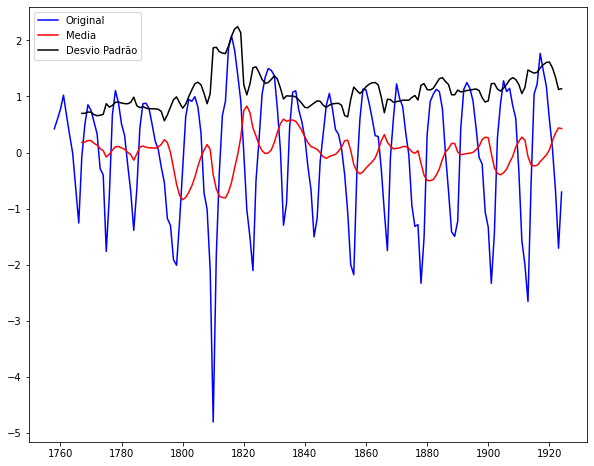



Verificando estatisticamente se a time series é estacionária


test statistics           -4.959170
Pvalue                     0.000027
Number of lags             8.000000
Number of observation    158.000000
Critical Values (1%)      -3.472431
Critical Values (5%)      -2.880013
Critical Values (10%)     -2.576619
dtype: float64


In [15]:
# Difference simple moving average

meanLogAVG = df_logscale.rolling(window=10).mean()

df_logscaleMinusAVG =  df_logscale - meanLogAVG

df_logscaleMinusAVG.dropna(inplace = True)

checkStationary(df_logscaleMinusAVG)

<p>Melhoramos o valor do dataset e o tornamos mais confiável</p>

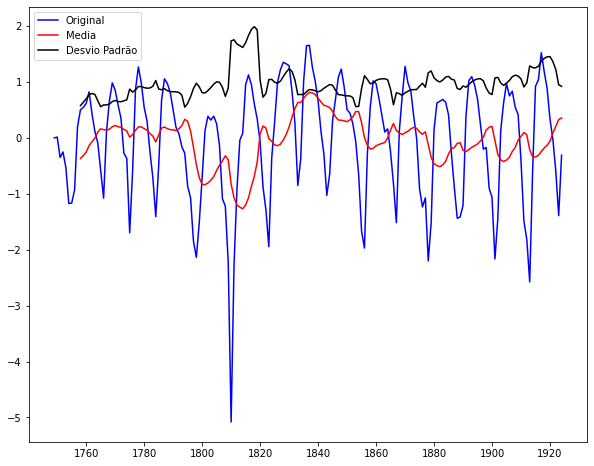



Verificando estatisticamente se a time series é estacionária


test statistics           -2.363267
Pvalue                     0.152373
Number of lags            10.000000
Number of observation    165.000000
Critical Values (1%)      -3.470616
Critical Values (5%)      -2.879221
Critical Values (10%)     -2.576197
dtype: float64


In [16]:
# Difference exponencial Moving Average

exponencialAVG = df_logscale.ewm(halflife=10, adjust= True).mean()

df_logscaleExp = df_logscale - exponencialAVG

df_logscaleExp.dropna(inplace = True)

checkStationary(df_logscaleExp)

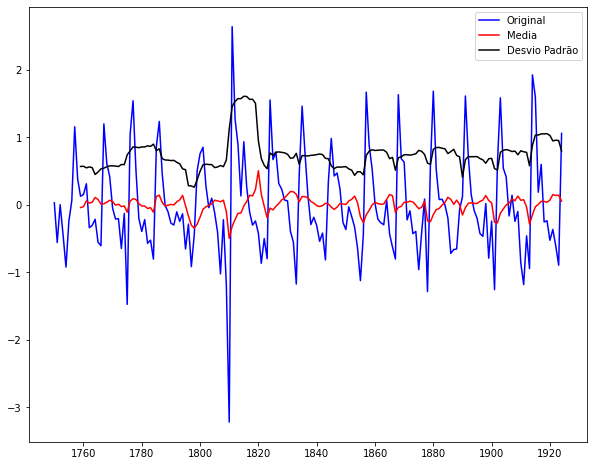



Verificando estatisticamente se a time series é estacionária


test statistics         -9.080215e+00
Pvalue                   4.075336e-15
Number of lags           9.000000e+00
Number of observation    1.650000e+02
Critical Values (1%)    -3.470616e+00
Critical Values (5%)    -2.879221e+00
Critical Values (10%)   -2.576197e+00
dtype: float64


In [17]:
# Difference previous Value

dfShift = df_logscale - df_logscale.shift()

dfShift.dropna(inplace = True)

checkStationary(dfShift)

<p>Observação:<br>
 A vantagem de usar estes métodos é que podemos repeti los inúmeras vezes até antingirmos nossos objetivos
 Por exemplo irei executar o Shift() de novo, no mesmo dataset.</p>

<p>Se o dataset não fosse estácionário, eu  poderia ficar executando esse comando até o torná lo. </p>

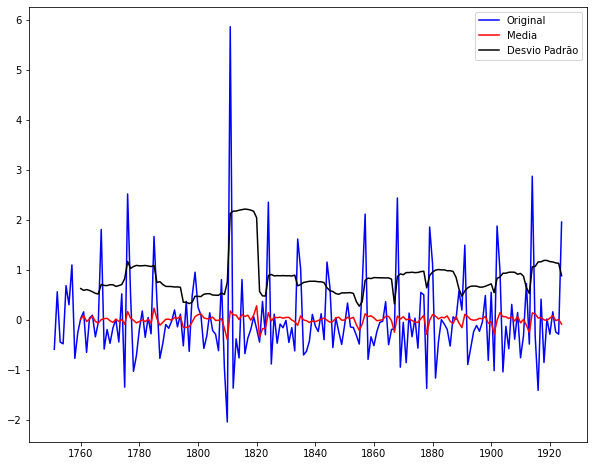



Verificando estatisticamente se a time series é estacionária


test statistics         -8.302411e+00
Pvalue                   3.985544e-13
Number of lags           1.300000e+01
Number of observation    1.600000e+02
Critical Values (1%)    -3.471896e+00
Critical Values (5%)    -2.879780e+00
Critical Values (10%)   -2.576495e+00
dtype: float64


In [18]:
# Execução de exemplo
dfShift2 = dfShift - dfShift.shift()

dfShift2.dropna(inplace = True)

checkStationary(dfShift2)

<h3>Verificando a correlação e autocorrelação dos dados na time series</h3>

<p>Parte necessária para a realização das previsões.</p>


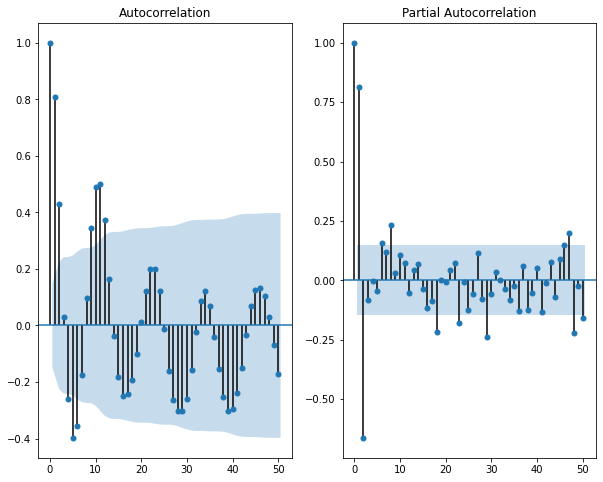

In [19]:
fig, ax = plt.subplots(1,2, figsize = (10,8))

plot_acf(solar.values.tolist(), lags = 50, ax=ax[0])
plot_pacf(solar.values.tolist(), lags = 50, ax= ax[1])
plt.show()

<p>Usando somente a visualização de gráficos para conseguirmos a melhor combinação do ARMA model não fica claro.<br>
Mais uma vez vamos fazer uso de uma biblioteca para nos mostrar a melhor combinação no formato numérico</p>


In [20]:
# Aqui temos a melhor combinação possível (2,0)
arma_order_select_ic(solar)

{'bic':              0            1            2
 0  1757.934928  1611.404279  1528.670499
 1  1574.875473  1525.706231  1505.816037
 2  1484.420153  1487.582907  1492.633156
 3  1487.419771  1491.253184  1496.371928
 4  1492.489716  1496.384974  1501.482890,
 'bic_min_order': (2, 0)}

<p>Podemos verificar que o nosso modelo aprendeu os dados com uma certa precisão, mesmo sendo os dados originais que já eram estacionários.</p>

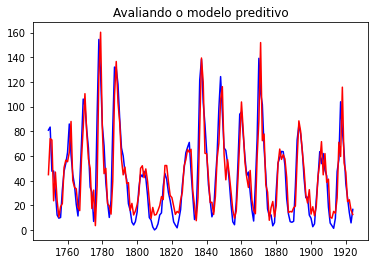

In [21]:
# Verificando o aprendizado do modelo
model = ARIMA(solar, order=(2,0,0))
results = model.fit(disp = -1)
plt.plot(solar, color ='blue')
plt.plot(results.fittedvalues, color= 'red')
plt.title("Avaliando o modelo preditivo")
plt.show()

<h3>A seguir irei realizar algumas previsões para testar o modelo.</h3>

In [22]:
# realizando previsões
results2 = results.predict(start = '1872-01-01', end = '1924-01-01' )

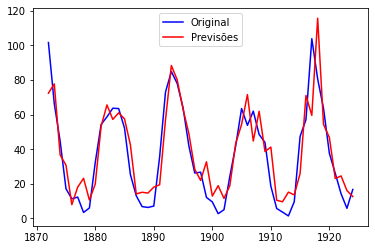

In [23]:
# Comparando as previsões com os valores originais
plt.plot(solar['1872-01-01':'1924-01-01'], color = 'blue', label = 'Original')
plt.plot(results2, color='red', label = 'Previsões')
plt.legend(loc = 'best')
plt.show()

In [24]:
#Prevendo valores para os anos 2000

previsoes = results.predict(start='1900-01-01', end='2000-01-01')
dfPredict = pd.DataFrame(previsoes, columns=['Manchas'])
dfPredict

,Manchas
1900-01-01,12.893584
1901-01-01,18.879340
1902-01-01,11.486337
1903-01-01,18.960845
1904-01-01,43.367332
...,...
1996-01-01,44.864019
1997-01-01,44.864019
1998-01-01,44.864020
1999-01-01,44.864021


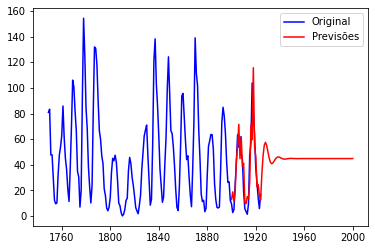

In [25]:
# Realizando a comparação de valores novamente
plt.plot(solar, color = 'blue', label = 'Original')
plt.plot(dfPredict, color='red', label = 'Previsões')
plt.legend(loc = 'best')
plt.show()

<h2><font color = 'blue'>Conclusão</font></h2><br>
<p>Esta foi minha primeira experiência com Time Serie, para realizá la usei como fontes diversos blogs e alguns videos.<br>
As informações a respeito destas técnicas são escassas, porém, irei deixar uma lista bibliográfica com alguns endereços que usei:</p>

<h3>Bibliografias</h3>

https://machinelearningmastery.com/make-sample-forecasts-arima-python/

https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
